In [29]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import eigvals

In [30]:
# generate an 2n by 2n matrix with random entries and zero diagonal
def generate_matrix(n):
    A = np.random.rand(2*n, 2*n)
    A = (A + A.T)/2
    A = A - np.diag(np.diag(A))
    return A
# compute and print the schur complement of A, for n by n blocks
def schur_complement(A, n):
    A11 = A[:n, :n]
    A12 = A[:n, n:]
    A21 = A[n:, :n]
    A22 = A[n:, n:]
    S = A22 - A21 @ np.linalg.inv(A11) @ A12
    return S

In [31]:
A = generate_matrix(2)

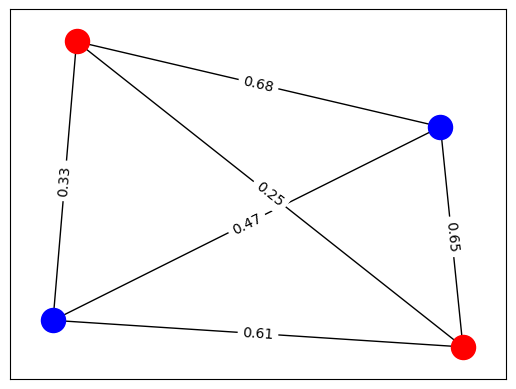

In [34]:
# plot the graph from A
# first n nodes one side and other other side with weights

n = 2
G = nx.from_numpy_matrix(A)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=range(n), node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=range(n, 2*n), node_color='b')
# add edges with weights labels with two decimals
nx.draw_networkx_edges(G, pos)
labels = nx.get_edge_attributes(G,'weight')
labels = {k:round(v,2) for k,v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

[[-3.51989508 -2.03856138]
 [-2.03856138 -1.5914986 ]]


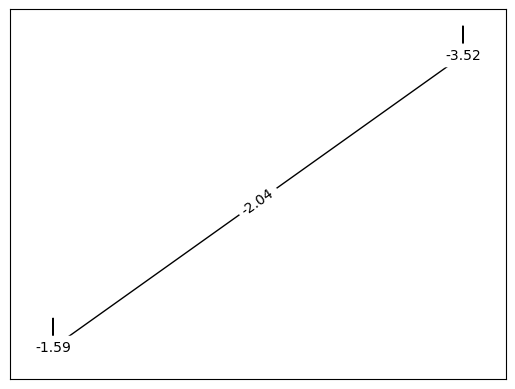

In [36]:
# compute the schur complement of A and plot the graph
B = schur_complement(A, n)
print(B)
G = nx.from_numpy_matrix(B)
pos = nx.circular_layout(G)
# add edges with weights labels with two decimals
nx.draw_networkx_edges(G, pos)
labels = nx.get_edge_attributes(G,'weight')
labels = {k:round(v,2) for k,v in labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()